###### Problem:
Suppose that we have N cars parked in a line occupying spaces 1 to N. Spaces N+1 to 2N are empty.  

Every minute, a car in space i is considered eligible to move forward one space if i+1 is empty and i < 2N.

Suppose that every minute, if a car is eligible to move, then it has a 1/2 chance of moving forward by one space. What is the expected number of minutes before the cars occupy squares N+1 to 2N?

In [492]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [411]:
def sim(n):
    arr = [1]*n + [0]*n
    ans = 0
    
    while sum(arr[0:n]) > 0:
        canMove = [0] * (len(arr) - 1)
        for i in range(len(arr) - 1):
            canMove[i] = (arr[i] == 1 and arr[i+1] == 0)
        
        for i in range(len(arr) - 1):
            if arr[i] and canMove[i] and random.randint(0,1):
                arr[i], arr[i+1] = 0, 1
        
        ans += 1
        
    return ans

In [412]:
def run(n, k):
    times = []
    for i in range(k):
        times.append(sim(n))
    return times

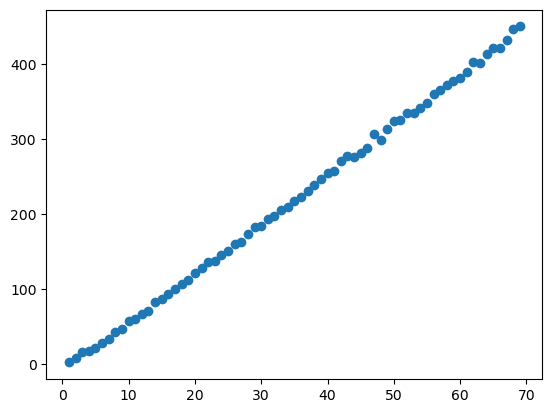

In [499]:
n = 70
k = 10

x = list(range(1,n))
y = []
for i in range(1,n):
    times = run(i,k)
    avg = sum(times) / len(times)
    y.append(avg)

plt.scatter(x, y)

In [507]:
coefficients = np.polyfit(x, y, 1)

slope = coefficients[0]
intercept = coefficients[1]

print("Slope:", slope)
print("Intercept:", intercept)

Slope: 6.600730727073438
Intercept: -11.461807331628314
